<a href="https://colab.research.google.com/github/luizkrawiec/estatistics/blob/main/distribui%C3%A7%C3%A3o_de_frequ%C3%AAncias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Distribuição de Frequências**

In [52]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import plotly.express as px

In [24]:
enem_sp = pd.read_csv('/content/enem_2019_tratado.csv', sep=',', encoding='ISO-8859-1')

In [25]:
enem_sp.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


In [26]:
enem_sorocaba = enem_sp.loc[enem_sp.NO_MUNICIPIO_RESIDENCIA == 'Sorocaba']

In [27]:
enem_sorocaba.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
42,"1,90E+11",Sorocaba,27,F,1,branca,1,1,não_respondeu,NaN,...,49.1,Espanhol,1.0,140.0,40.0,40.0,140.0,40.0,400.0,Sim
192,"1,90E+11",Sorocaba,34,M,1,branca,1,1,não_respondeu,NaN,...,751.3,Inglês,1.0,120.0,120.0,140.0,120.0,40.0,540.0,Sim
226,"1,90E+11",Sorocaba,24,F,1,branca,1,1,não_respondeu,NaN,...,609.8,Inglês,1.0,100.0,40.0,80.0,80.0,0.0,300.0,Sim
358,"1,90E+11",Sorocaba,22,F,1,branca,1,1,não_respondeu,NaN,...,587.8,Inglês,1.0,120.0,180.0,140.0,120.0,120.0,680.0,Sim
409,"1,90E+11",Sorocaba,34,F,2,branca,1,1,não_respondeu,NaN,...,566.2,Espanhol,1.0,120.0,120.0,100.0,100.0,60.0,500.0,Sim


In [28]:
enem_sorocaba.shape

(8088, 28)

In [29]:
idades = enem_sorocaba['IDADE']

In [30]:
idades

42        27
192       34
226       24
358       22
409       34
          ..
499512    23
499592    17
499619    17
499646    18
499839    20
Name: IDADE, Length: 8088, dtype: int64

In [31]:
freq_absoluta = Counter(idades)

In [32]:
freq_absoluta

Counter({27: 76,
         34: 42,
         24: 154,
         22: 279,
         28: 87,
         30: 52,
         19: 872,
         25: 114,
         17: 2993,
         18: 1558,
         29: 72,
         32: 50,
         20: 556,
         36: 37,
         21: 372,
         23: 206,
         26: 105,
         39: 29,
         38: 29,
         37: 26,
         41: 20,
         31: 40,
         33: 41,
         54: 13,
         40: 23,
         47: 8,
         43: 21,
         50: 7,
         35: 42,
         61: 6,
         60: 4,
         42: 23,
         53: 9,
         49: 11,
         46: 18,
         45: 14,
         48: 15,
         64: 2,
         57: 2,
         52: 9,
         51: 11,
         16: 8,
         44: 14,
         56: 4,
         58: 2,
         65: 1,
         59: 2,
         15: 3,
         62: 1,
         73: 1,
         14: 1,
         70: 1,
         55: 2})

In [33]:
freq_absoluta = pd.DataFrame.from_dict(freq_absoluta, orient='index')

In [34]:
freq_absoluta

,0
27,76
34,42
24,154
22,279
28,87
30,52
19,872
25,114
17,2993
18,1558


In [35]:
freq_absoluta = freq_absoluta.sort_index(ascending=True)

In [36]:
freq_absoluta

,0
14,1
15,3
16,8
17,2993
18,1558
19,872
20,556
21,372
22,279
23,206


In [37]:
freq_relativa = freq_absoluta / freq_absoluta.sum()

In [38]:
freq_relativa

,0
14,0.000124
15,0.000371
16,0.000989
17,0.370054
18,0.192631
19,0.107814
20,0.068744
21,0.045994
22,0.034496
23,0.025470


In [39]:
freq_relativa_perc = freq_relativa * 100

In [40]:
freq_relativa_perc

,0
14,0.012364
15,0.037092
16,0.098912
17,37.005440
18,19.263106
19,10.781405
20,6.874382
21,4.599407
22,3.449555
23,2.546983


# **Histograma**

Matplotlib

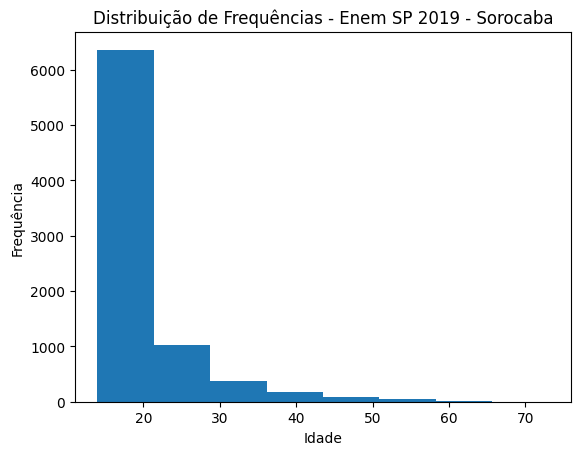

In [41]:
enem_sorocaba['IDADE'].plot.hist(bins=8)
plt.title('Distribuição de Frequências - Enem SP 2019 - Sorocaba')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

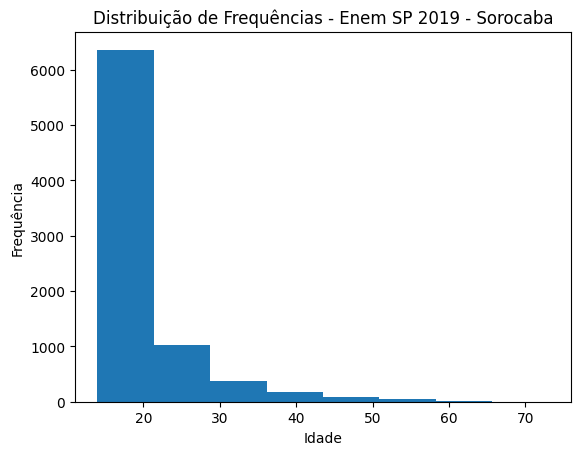

In [42]:
plt.hist(enem_sorocaba.IDADE, 8, rwidth=1)
plt.title('Distribuição de Frequências - Enem SP 2019 - Sorocaba')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show

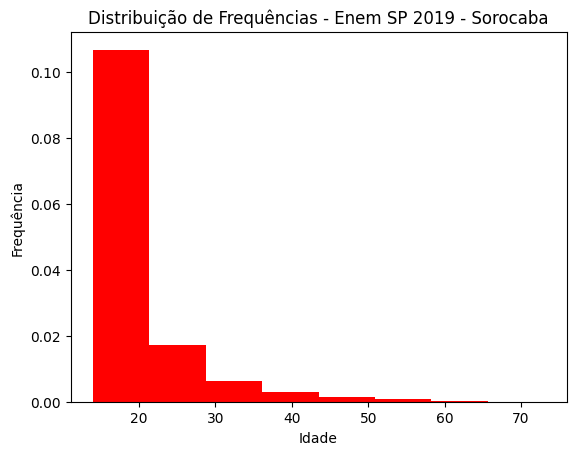

In [43]:
plt.hist(enem_sorocaba.IDADE,8, rwidth=1, color='red', density=True)
plt.title('Distribuição de Frequências - Enem SP 2019 - Sorocaba')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# **Seaborn**

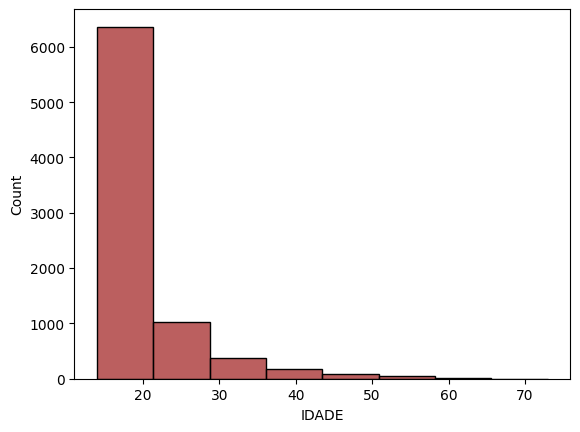

In [51]:
sns.histplot(enem_sorocaba['IDADE'], bins=8, color='brown', kde=False);

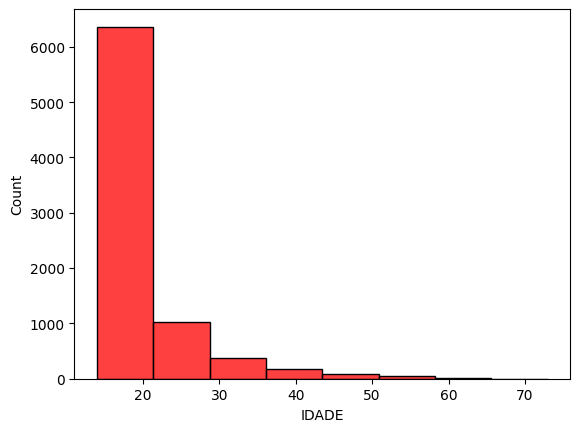

In [46]:
sns.histplot(enem_sorocaba['IDADE'], bins=8, color='red');

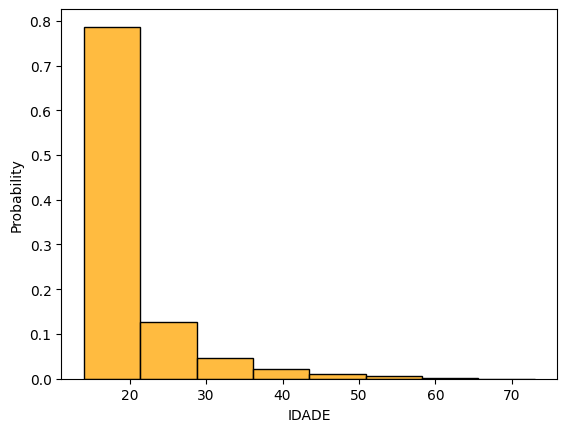

In [47]:
sns.histplot(enem_sorocaba, x='IDADE', bins=8, color='orange', kde=False, stat='probability');

# **Plotly**

In [54]:
grafico = px.histogram(enem_sorocaba, x='IDADE', nbins=10, histnorm='density')
grafico.update_layout(width=500,height=500,title_text='Distribuição de Frequências - Enem SP 2019 - Sorocaba')
grafico.show()

In [56]:
grafico = px.histogram(enem_sorocaba, x='IDADE', nbins=10, histnorm='probability', color='SEXO')
grafico.update_layout(width=500,height=500,title_text='Distribuição de Frequências - Enem SP 2019 - Sorocaba', title_font_color = 'red')
grafico.show()

In [59]:
grafico = px.histogram(enem_sorocaba, x='NOTA_MT', nbins=20, color='SEXO')
grafico.update_layout(width=500,height=500,title_text='Notas de Matemática - Enem SP 2019 - Sorocaba', title_font_color = 'red')
grafico.show()

In [60]:
grafico = px.histogram(enem_sorocaba, x='NOTA_CN', nbins=20, color='SEXO')
grafico.update_layout(width=500,height=500,title_text='Notas de Matemática - Enem SP 2019 - Sorocaba', title_font_color = 'red')
grafico.show()

In [64]:
grafico = px.histogram(enem_sorocaba, x='NOTA_LC', nbins=20, color='SEXO', histnorm='percent')
grafico.update_layout(width=500,height=500,title_text='Notas de Matemática - Enem SP 2019 - Sorocaba', title_font_color = 'red')
grafico.show()

In [62]:
grafico = px.histogram(enem_sorocaba, x='NOTA_CH', nbins=20, color='SEXO')
grafico.update_layout(width=500,height=500,title_text='Notas de Matemática - Enem SP 2019 - Sorocaba', title_font_color = 'red')
grafico.show()

In [65]:
grafico = px.histogram(enem_sorocaba, x='NOTA_REDACAO', nbins=20, color='RACA')
grafico.update_layout(width=500,height=500,title_text='Notas de Matemática - Enem SP 2019 - Sorocaba', title_font_color = 'red')
grafico.show()